<a href="https://colab.research.google.com/github/baker371/k8-data-visualization/blob/lwasampijja-baker/upwork-devs/lwasampijja-baker/All_Progress_Issues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Table Showing All Open Issues

In [ ]:
#@title

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import requests
import json
import os
import numpy as np
import pandas as pd 
from pandas import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt 
import datetime
%reload_ext google.colab.data_table

!cp "/content/drive/My Drive/models/issues.py" .


from issues import *

repos = Repos.get_repos()

issues = Issues(repos)

dfs                   = []
for repo in repos:
  jtoken                = os.getenv('dtollaku', '')
  headers               = {'Authorization': f'token {jtoken}'}
  url                   = f'https://api.github.com/repositories/{repo[1]}/issues'

  res                   = requests.get(url, headers=headers, params={'state': 'open'}).json()
  data                  = json_normalize(res, max_level=1)
  temp_df               = pd.DataFrame(data)
  temp_df['repo']       = repo[0]
  dfs.append(temp_df)
  df                    = pd.concat(dfs, ignore_index=True)
  df['created_at']      = pd.to_datetime(df['created_at']).dt.date
  df['Aging Days']      = datetime.datetime.now().date() - df['created_at'] 
  df                    = df[['repo','title','assignee.login', 'created_at', 'Aging Days']]
  df                    = df.rename({'repo':'Project', 'title':'Issue Title', 'assignee.login':'Assignees', 'created_at':'Date Created'}, axis=1)

df

Mounted at /content/drive


,Project,Issue Title,Assignees,Date Created,Aging Days
0,aws-jmeter-test-engine-v1,Have capability to automatically assign Ec2 instances based on any number of total users not just 4k,pranaysahith,2020-10-13,1 days
1,aws-jmeter-test-engine-v1,Move Transactions for status checks to separate thread group,MaNe2020,2020-10-08,6 days
2,aws-jmeter-test-engine-v1,Fetch ICAP Server metrics and send to Influx DB,NaN,2020-10-05,9 days
3,aws-jmeter-test-engine-v1,Create instruction documentation on how to execute tests once set up is complete,jpoolGW,2020-10-05,9 days
4,aws-jmeter-test-engine-v1,Optimize usage of S3 while load is running,NaN,2020-10-02,12 days
5,aws-jmeter-test-engine-v1,Create heart beat load test using the defined base load script on test plan,uzfarid,2020-10-01,13 days
6,aws-jmeter-test-engine-v1,Create stress test using the defined stress load script on test plan,NaN,2020-10-01,13 days
7,aws-jmeter-test-engine-v1,Create peak load test using the defined peak load script on test plan,NaN,2020-10-01,13 days
8,aws-jmeter-test-engine-v1,Create Base load test using the defined base load script on test plan,uzfarid,2020-10-01,13 days
9,aws-jmeter-test-engine-v1,Add readme with all instructions for setup,uzfarid,2020-10-01,13 days


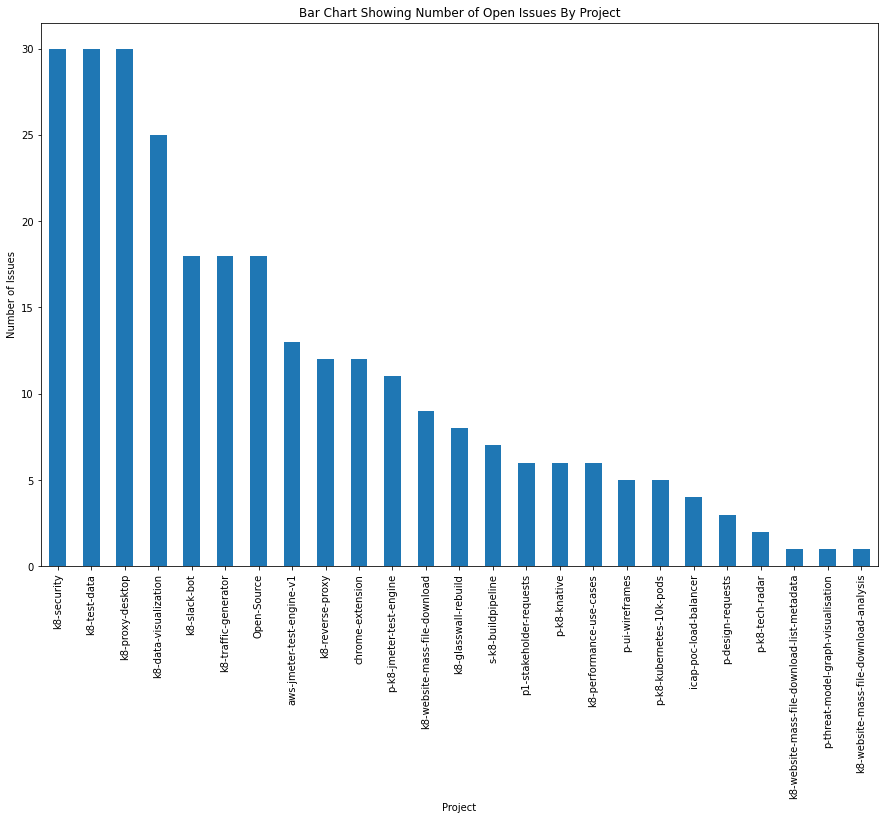

In [ ]:
#@title
plt.figure(figsize=(15,10))
df["Project"].value_counts().plot.bar(title="Bar Chart Showing Number of Open Issues By Project")
plt.ylabel('Number of Issues')
plt.xlabel('Project')
plt.show()

#### A Table Showing issues assigned to a person across multiple repos and Export to Excel

In [ ]:
  #@title 

project_filter = [" "] #@param {type:"raw"}

assignee_filter = ["baker371"] #@param {type:"raw"}


In [ ]:
#@title
filter1 = df["Project"].isin(project_filter) 
filter2 = df["Assignees"].isin(assignee_filter) 
df[filter1 | filter2]

,Project,Issue Title,Assignees,Date Created,Aging Days
34,k8-data-visualization,Visualise_Zenhub_Pipelines notebook is showing some error.,baker371,2020-10-13,1 days
35,k8-data-visualization,issues notebook is showing some error,baker371,2020-10-13,1 days
36,k8-data-visualization,Data_analysis_and_visualization notebook is showing error,baker371,2020-10-13,1 days
37,k8-data-visualization,Enhance All_Progress_Issues notebook,baker371,2020-10-13,1 days
52,k8-data-visualization,Apply Text2Code for Jupyter notebook - Lwasampijja,baker371,2020-09-14,30 days


#### Export to Excel

In [ ]:
#@title
df.to_csv('report.csv')

#### Open Issues per Assignee

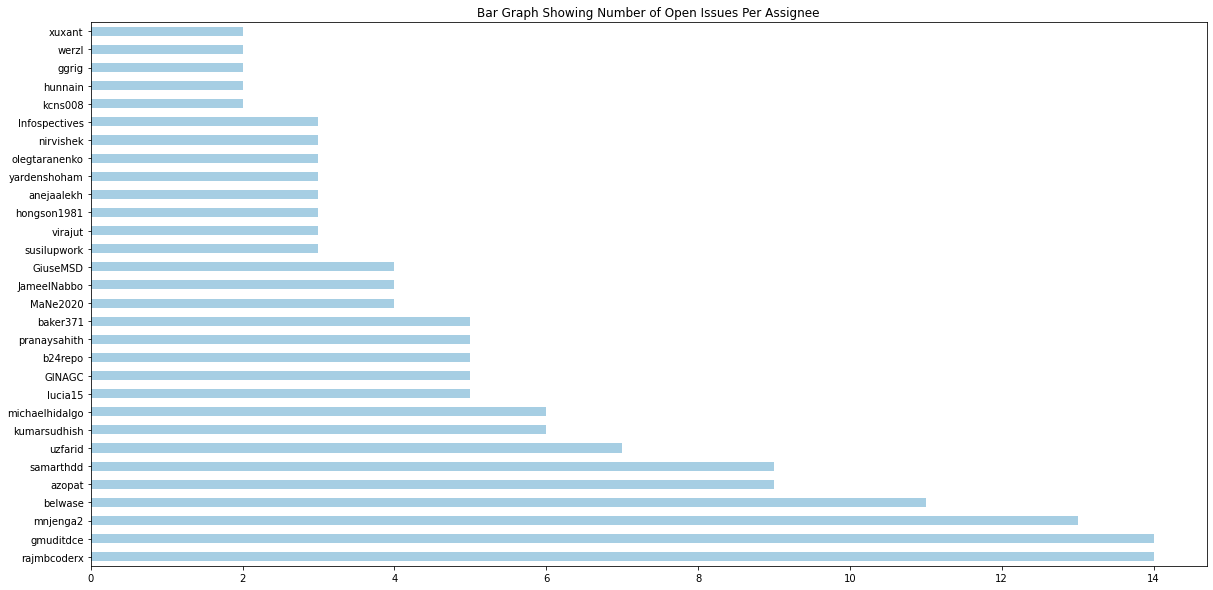

In [ ]:
#@title
df['Assignees'].value_counts().head(30).plot(kind='barh', colormap='Paired', figsize=(20,10), title="Bar Graph Showing Number of Open Issues Per Assignee")
        

#### Visualising Zenhub Pipelines Per Repos



In [ ]:
#@title
issues.show_tabular_report_by_repo()

pipeline,,Backlog,In Progress,New Issues,Peer Review
repo,,,,,
Open-Source,24,0,2,3,1
aws-jmeter-test-engine-v1,30,0,0,0,0
chrome-extension,7,0,4,4,4
icap-poc-load-balancer,7,0,0,0,0
k8-data-visualization,14,1,6,0,9
k8-glasswall-rebuild,23,0,2,4,1
k8-performance-use-cases,17,1,1,2,2
k8-proxy-desktop,11,1,6,6,6
k8-proxy-marketing,5,0,0,0,0


#### Visualising Zenhub Pipelines Per User

In [ ]:
#@title
issues.show_tabular_report_by_user()

pipeline,,Backlog,In Progress,New Issues,Peer Review
assignee.login,,,,,
Abby595,0,0,0,1,0
DGBREW,2,0,0,1,0
DinisCruz,1,0,0,0,0
GiuseMSD,0,0,0,2,1
Infospectives,0,0,0,3,0
IslamHeggy,1,0,0,0,1
JOSHUAJEBARAJ,2,0,0,0,0
JameelNabbo,2,0,0,4,0
M-Ayman,0,0,0,0,1
